# UD1 Homework

Student: Lorena Caswell Alonso (100013554@alumnos.uimp.es)

We start by defining the 3 distributions:
- Gaussian:
$X \in (-\inf,+\inf)$
    - Mean: $\mu$
    - Standard deviation: $\sigma$

- Uniform:
$X \in [a,b]$
    - Mean: $\frac{a+b}{2}$
    - Variance: $\frac{(b-a)^2}{12}$

- Beta:
$X \in [0,1]$
    - Mean: $\frac{\alpha}{\alpha+\beta}$
    - Variance: $\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

We'll select a set of parameters so that we have different gaussian and beta distributions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, beta as beta_dist
import pandas as pd

#grpahs inside the notebook
%matplotlib inline

#fix the random seed to ensure reproducilibilty
np.random.seed(42)

In [ ]:
#Function to generate n samples of the gaussian distribution with different averages (mu) and deviations (sigma)
def fgaussian(mu, sigma, n):
    return np.random.normal(loc=mu, scale=sigma, size=n)

#Function to generate n samples from a uniform distribution in th inerval [a,b]
def funiform(a,b,n):
    return np.random.uniform(low=a,high=b,size=n)

#Function to generate n samples from a beta distibution with parameters alpha and beta
def fbeta(alpha, beta, n):
    return np.random.beta(a=alpha, b=beta, size=n)

In [ ]:
n=1000

gaussian_params=[(0,2),(0,5),(4,1)]
gaussian_samples=[fgaussian(mu,sigma,n) for (mu,sigma) in gaussian_params]

a=0.0
b=1.0
uniform_samples=funiform(a,b,n)

beta_params=[(2,2),(0.5,0.5),(5,1),(2,5)]
beta_samples=[fbeta(alpha,beta,n) for (alpha,beta) in beta_params]

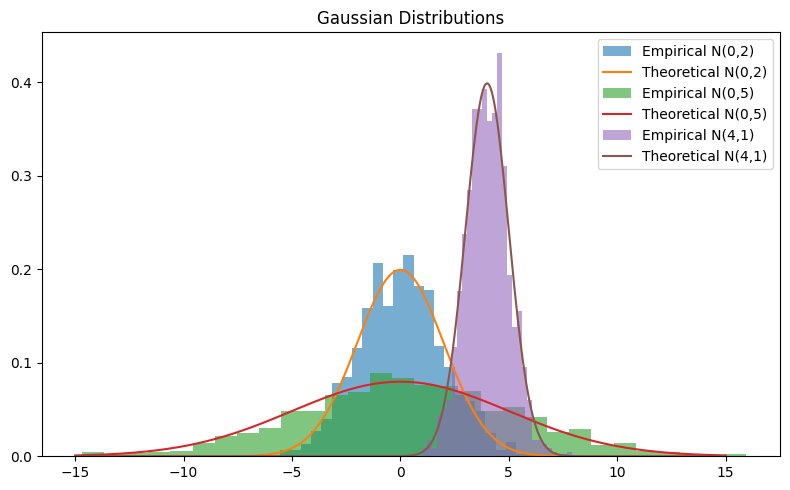

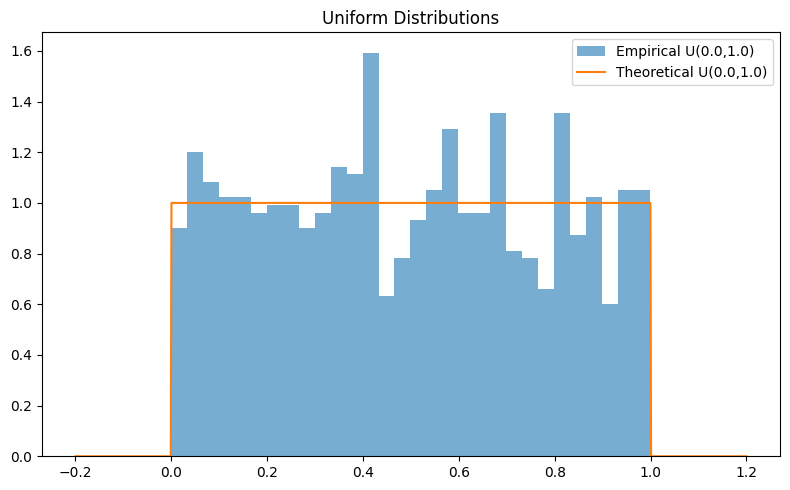

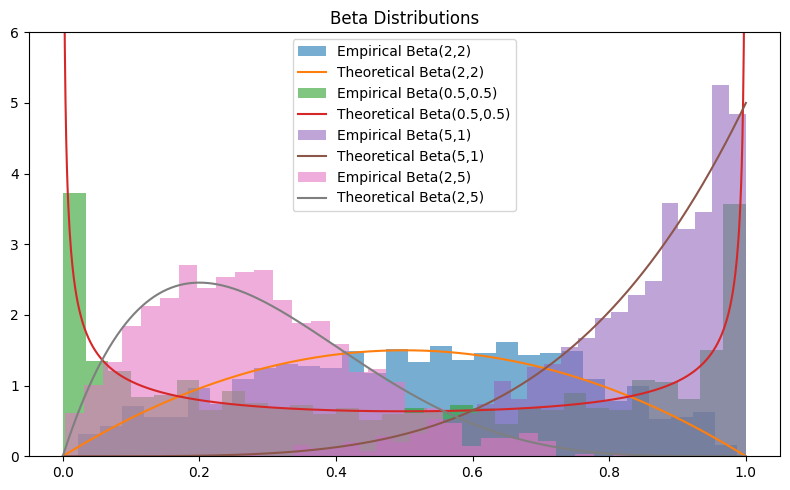

In [ ]:
#Gaussian distribution plots (theorical + histogram)
plt.figure(figsize=(8,5))
x = np.linspace(-15, 15, 1000)
for (mu,sigma), samples in zip(gaussian_params, gaussian_samples):
    plt.hist(samples, bins=30, density=True, alpha=0.6, label=f'Empirical N({mu},{sigma})')
    plt.plot(x, norm.pdf(x, mu, sigma), label=f'Theoretical N({mu},{sigma})')
plt.title('Gaussian Distributions')
plt.legend()
plt.tight_layout()
plt.show()

#Uniform distribution plot (theorical + histogram)
plt.figure(figsize=(8,5))
plt.hist(uniform_samples,bins=30,density=True,alpha=0.6,label=f'Empirical U({a},{b})')
x = np.linspace(-0.2, 1.2, 1000)
plt.plot(x, uniform.pdf(x, a, b-a), label=f'Theoretical U({a},{b})')
plt.title(f'Uniform Distributions')
plt.legend()
plt.tight_layout()
plt.show()

#Beta distribution plots (theorical + histogram)
plt.figure(figsize=(8,5))
x = np.linspace(0, 1, 1000)
for (alpha,beta), samples in zip(beta_params, beta_samples):
    plt.hist(samples, bins=30, density=True, alpha=0.6, label=f'Empirical Beta({alpha},{beta})')
    plt.plot(x, beta_dist.pdf(x, alpha, beta), label=f'Theoretical Beta({alpha},{beta})')
plt.title('Beta Distributions')
plt.ylim(0, 6)
plt.legend()
plt.tight_layout()
plt.show()

## Problem 1 - Confidence intervals with Hoeffding and Chebyshev

Estimate and compare the confidence intervals or error bars obtained for each distribution using Hoeffding's inequality and the Chebyshev inequality (for the latter one, you need to analyze or empirically estimate the variance).

For solving this problem we must first generate n=1000 samples for every distribution. Then we will compute the emprical mean and variance values. Then we have to build a confidence interval for the mean using Hoeffding's and Chebyshev's inequality.

We have to note that the Hoeffding requires that the random variable is bounded in [a,b], which only applies to the uniform and beta distribution. For the normal/gaussian we have to use Chebysehv

- Hoeffding:
$\mathbb{P}\left(|\bar{X} - \mathbb{E}[X]| \ge \varepsilon \right) \le 2 \exp\left(-\frac{2 n \varepsilon^2}{(b-a)^2}\right).$

    For a confidence level $(1 - \delta)$:
$\varepsilon_H = (b-a)\sqrt{\frac{1}{2n}\ln\frac{2}{\delta}}.$

- Chebyshev:
$\mathbb{P}\left(|\bar{X} - \mu| \ge \varepsilon \right) \le \frac{\sigma^2}{n\varepsilon^2}.$

    For a confidence level $(1 - \delta)$:
$\varepsilon_C = \sqrt{\frac{\sigma^2}{n\delta}}.$

## Problem 2 - Compare with the theoretical values

In [ ]:
def mean_var(sample):
    mean=np.mean(sample)
    var=np.var(sample,ddof=1)
    return mean,var

def Hoeffding(n,a,b,delta):
    return(b-a)*np.sqrt(np.log(2/delta)/(2*n))

def Chebyshev(var,n,delta): #depends on the variance, we'll calculate it from the empirical variance
    return np.sqrt(var/(n*delta))

In [ ]:
delta=0.05 #1-delta=0.95 confidence level

results=[]

#Gaussian distribution
for (mu,sigma), samples in zip(gaussian_params, gaussian_samples):
    g_mean, g_var=mean_var(samples)
    g_t_mean=mu
    g_t_var=sigma**2
    #g_hoeffding=Hoeffding(n,-np.inf,np.inf,delta)
    g_chebyshev=Chebyshev(g_var,n,delta)
    results.append(
        {'name':f'Gaussian({mu},{sigma})',
         'mean_theo':g_t_mean,
         'var_theo':g_t_var,
         'mean':g_mean,
         'var':g_var,
         'hoeffding':None,
         'chebyshev':g_chebyshev,
         'hoeffding_interval':None,
         'chebyshev_interval':(g_mean - g_chebyshev, g_mean + g_chebyshev)}
    )


#Uniform distribution
for samples in [uniform_samples]:
    u_mean, u_var=mean_var(samples)
    u_t_mean=(a+b)/2
    u_t_var=((b-a)**2)/12
    u_hoeffding=Hoeffding(n,a,b,delta)
    u_chebyshev=Chebyshev(u_var,n,delta)
    results.append({
        'name':f'Uniform({a},{b})',
        'mean_theo':u_t_mean,
        'var_theo':u_t_var,
        'mean':u_mean,
        'var':u_var,
        'hoeffding':u_hoeffding,
        'chebyshev':u_chebyshev,
        'hoeffding_interval':(u_mean - u_hoeffding, u_mean + u_hoeffding),
        'chebyshev_interval':(u_mean - u_chebyshev, u_mean + u_chebyshev)
    })

#Beta distribution
for (alpha,beta), samples in zip(beta_params, beta_samples):
    b_mean, b_var=mean_var(samples)
    b_t_mean=alpha/(alpha+beta)
    b_t_var=(alpha*beta)/(((alpha+beta)**2)*(alpha+beta+1))
    b_hoeffding=Hoeffding(n,0,1,delta)
    b_chebyshev=Chebyshev(b_var,n,delta)
    results.append({
        'name':f'Beta({alpha},{beta})',
        'mean_theo':b_t_mean,
        'var_theo':b_t_var,
        'mean':b_mean,
        'var':b_var,
        'hoeffding':b_hoeffding,
        'chebyshev':b_chebyshev,
        'hoeffding_interval':(b_mean - b_hoeffding, b_mean + b_hoeffding),
        'chebyshev_interval':(b_mean - b_chebyshev, b_mean + b_chebyshev)
    })

for res in results:
    #extract and force to float
    mean_theo=res.get("mean_theo",None)
    mean_emp=res.get("mean",None)
    var_theo=res.get("var_theo",None)
    var_emp=res.get("var",None)
    hoeff=res.get("hoeffding",None)
    cheby=res.get("chebyshev",None)
    hoeff_low=mean_emp - hoeff if hoeff is not None else None
    hoeff_high=mean_emp + hoeff if hoeff is not None else None
    cheby_low=mean_emp - cheby if cheby is not None else None
    cheby_high=mean_emp + cheby if cheby is not None else None

    print(f"============={res['name']}============")
    print(f" Theoretical Mean: {mean_theo:.4f} | Empirical Mean: {mean_emp:.4f}")
    print(f" Theoretical Variance: {var_theo:.4f} | Empirical Variance: {var_emp:.4f}")
    if hoeff is not None:
        print(f" Hoeffding Bound: {hoeff:.4f}")
        print(f" Hoeffding Confidence Interval: ({hoeff_low:.4f},{hoeff_high:.4f})")
    else:
        print(" Hoeffding Bound: Not Applicable")
        print(" Hoeffding Confidence Interval: Not Applicable")
    print(f" Chebyshev Bound: {cheby:.4f}")
    print(f" Chebyshev Confidence Interval: ({cheby_low:.4f},{cheby_high:.4f})")
    print()

=============Gaussian(0,2)============
 Theoretical Mean: 0.0000 | Empirical Mean: 0.0387
 Theoretical Variance: 4.0000 | Empirical Variance: 3.8355
 Hoeffding Bound: Not Applicable
 Hoeffding Confidence Interval: Not Applicable
 Chebyshev Bound: 0.2770
 Chebyshev Confidence Interval: (-0.2383,0.3156)

=============Gaussian(0,5)============
 Theoretical Mean: 0.0000 | Empirical Mean: 0.3542
 Theoretical Variance: 25.0000 | Empirical Variance: 24.8729
 Hoeffding Bound: Not Applicable
 Hoeffding Confidence Interval: Not Applicable
 Chebyshev Bound: 0.7053
 Chebyshev Confidence Interval: (-0.3511,1.0595)

=============Gaussian(4,1)============
 Theoretical Mean: 4.0000 | Empirical Mean: 4.0058
 Theoretical Variance: 1.0000 | Empirical Variance: 0.9672
 Hoeffding Bound: Not Applicable
 Hoeffding Confidence Interval: Not Applicable
 Chebyshev Bound: 0.1391
 Chebyshev Confidence Interval: (3.8668,4.1449)

=============Uniform(0.0,1.0)============
 Theoretical Mean: 0.5000 | Empirical Mean: 0

In [ ]:
#We present the results in a DataFrame for better visualization
rows=[]
for res in results:
    cheby_interval=res['chebyshev_interval']
    hoeff_interval=res['hoeffding_interval'] if res['hoeffding_interval'] is not None else (None,None)
    cheby_low, cheby_high=cheby_interval
    hoeff_low, hoeff_high=hoeff_interval

    rows.append({
        'Distribution': res['name'],
        'Mean - Theoretical': res['mean_theo'],
        'Mean - Empirical': res['mean'],
        'Variance - Theoretical': res['var_theo'],
        'Variance - Empirical': res['var'],
        'Hoeffding Bound': res['hoeffding'],
        'Chebyshev Bound': res['chebyshev'],
        'Hoeffding Interval': f"({float(hoeff_low):.4f}, {float(hoeff_high):.4f})" if hoeff_low is not None else "N/A",
        'Chebyshev Interval':f"({float(cheby_low):.4f}, {float(cheby_high):.4f})"
    })
df_results=pd.DataFrame(rows)
df_results=df_results.round(4)

df_results

,Distribution,Mean - Theoretical,Mean - Empirical,Variance - Theoretical,Variance - Empirical,Hoeffding Bound,Chebyshev Bound,Hoeffding Interval,Chebyshev Interval
0,"Gaussian(0,2)",0.0000,0.0387,4.0000,3.8355,NaN,0.2770,N/A,"(-0.2383, 0.3156)"
1,"Gaussian(0,5)",0.0000,0.3542,25.0000,24.8729,NaN,0.7053,N/A,"(-0.3511, 1.0595)"
2,"Gaussian(4,1)",4.0000,4.0058,1.0000,0.9672,NaN,0.1391,N/A,"(3.8668, 4.1449)"
3,"Uniform(0.0,1.0)",0.5000,0.4904,0.0833,0.0819,0.0429,0.0405,"(0.4474, 0.5333)","(0.4499, 0.5308)"
4,"Beta(2,2)",0.5000,0.5158,0.0500,0.0514,0.0429,0.0321,"(0.4728, 0.5587)","(0.4837, 0.5479)"
5,"Beta(0.5,0.5)",0.5000,0.4931,0.1250,0.1255,0.0429,0.0501,"(0.4502, 0.5361)","(0.4430, 0.5432)"
6,"Beta(5,1)",0.8333,0.8362,0.0198,0.0195,0.0429,0.0198,"(0.7932, 0.8791)","(0.8164, 0.8559)"
7,"Beta(2,5)",0.2857,0.2809,0.0255,0.0228,0.0429,0.0213,"(0.2379, 0.3238)","(0.2595, 0.3022)"


For each type of distribuiotn, we will plot a graph with the theoretical and empirical means and standard deviations, to see how wide the distribution itself is.

Next we also plot the Chebyshev and Hoeffding radii, which represent the uncertainty of the sample mean, not of the data.

Chebyshev usually offers larger intervarls, since it is computed using just the variance. Hoeffding is usually tighter for bounded distributions, since it uses the fact that the distributions are bounded.

However, as we can see in in the highly peaked beta distributions (B(5,1), B(2,5)), Chebyshev intervals can be smaller than Hoeffding because the variance is very small.

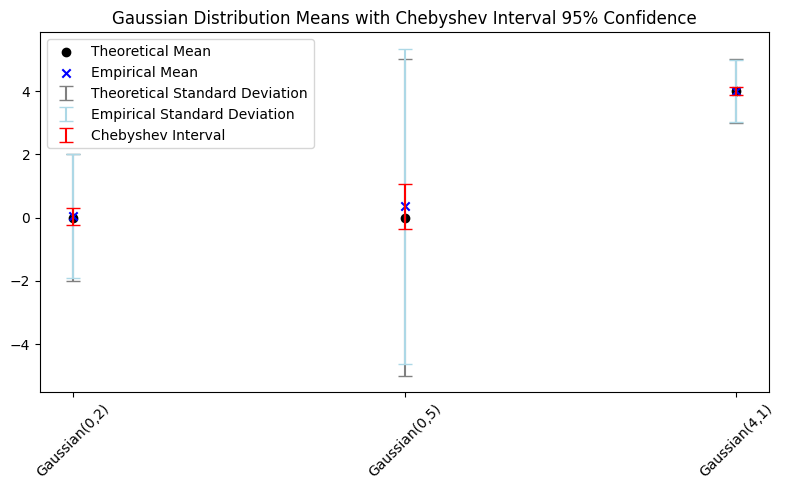

In [ ]:
#Gaussian
gaussian_results=[res for res in results if 'Gaussian' in res['name']]
names_g=[res['name'] for res in gaussian_results]
means_theo=[res['mean_theo'] for res in gaussian_results]
means_emp=[res['mean'] for res in gaussian_results]
var_theo=[res['var_theo'] for res in gaussian_results]
var_emp=[res['var'] for res in gaussian_results]
chebyshev=[res['chebyshev'] for res in gaussian_results]

x=np.arange(len(names_g))

plt.figure(figsize=(8,5))
plt.scatter(x, means_theo, label='Theoretical Mean', color='k', marker='o')
plt.errorbar(x, means_theo, yerr=np.sqrt(var_theo), fmt='none', ecolor='grey', capsize=5, label='Theoretical Standard Deviation')
plt.scatter(x, means_emp, label='Empirical Mean', color='b', marker='x')
plt.errorbar(x, means_emp, yerr=np.sqrt(var_emp), fmt='none', ecolor='lightblue', capsize=5, label='Empirical Standard Deviation')
plt.errorbar(x, means_emp, yerr=chebyshev, fmt='none', ecolor='r', capsize=5, label='Chebyshev Interval')
plt.xticks(x, names_g, rotation=45)
plt.title(f'Gaussian Distribution Means with Chebyshev Interval {(1 - delta)*100:.0f}% Confidence')
plt.legend()
plt.tight_layout()
plt.show()

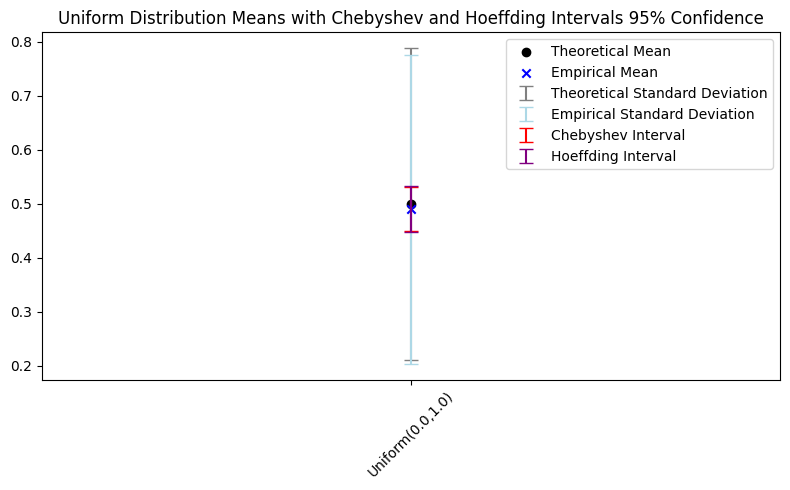

In [ ]:
#Uniform
uniform_results=[res for res in results if 'Uniform' in res['name']]
names_u=[res['name'] for res in uniform_results]
means_theo=[res['mean_theo'] for res in uniform_results]
means_emp=[res['mean'] for res in uniform_results]
var_theo=[res['var_theo'] for res in uniform_results]
var_emp=[res['var'] for res in uniform_results]
chebyshev=[res['chebyshev'] for res in uniform_results]
hoeffding=[res['hoeffding'] for res in uniform_results]
x=np.arange(len(names_u))
plt.figure(figsize=(8,5))
plt.scatter(x, means_theo, label='Theoretical Mean', color='k', marker='o')
plt.errorbar(x, means_theo, yerr=np.sqrt(var_theo), fmt='none', ecolor='grey', capsize=5, label='Theoretical Standard Deviation')
plt.scatter(x, means_emp, label='Empirical Mean', color='b', marker='x')
plt.errorbar(x, means_emp, yerr=np.sqrt(var_emp), fmt='none', ecolor='lightblue', capsize=5, label='Empirical Standard Deviation')
plt.errorbar(x, means_emp, yerr=chebyshev, fmt='none', ecolor='r', capsize=5, label='Chebyshev Interval')
plt.errorbar(x, means_emp, yerr=hoeffding, fmt='none', ecolor='purple', capsize=5, label='Hoeffding Interval')
plt.xticks(x, names_u, rotation=45)
plt.title(f'Uniform Distribution Means with Chebyshev and Hoeffding Intervals {(1 - delta)*100:.0f}% Confidence')
plt.legend()
plt.tight_layout()
plt.show()

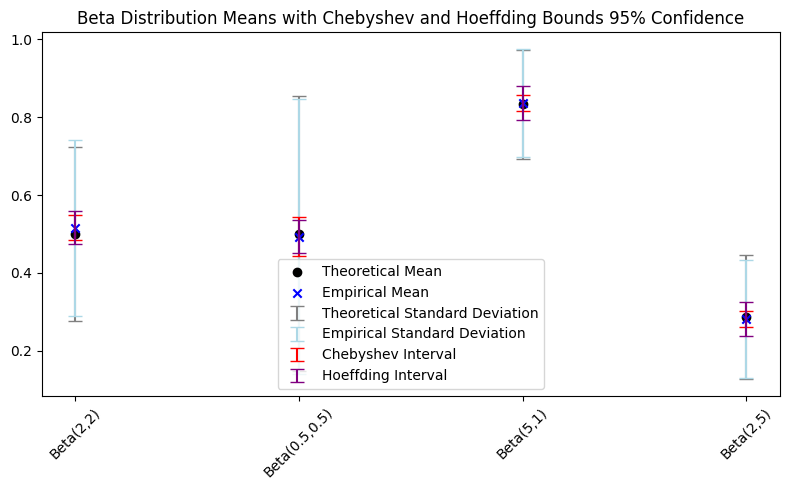

In [ ]:
#Beta
beta_results=[res for res in results if 'Beta' in res['name']]
names_b=[res['name'] for res in beta_results]
means_theo=[res['mean_theo'] for res in beta_results]
means_emp=[res['mean'] for res in beta_results]
var_theo=[res['var_theo'] for res in beta_results]
var_emp=[res['var'] for res in beta_results]
chebyshev=[res['chebyshev'] for res in beta_results]
hoeffding=[res['hoeffding'] for res in beta_results]
x=np.arange(len(names_b))
plt.figure(figsize=(8,5))
plt.scatter(x, means_theo, label='Theoretical Mean', color='k', marker='o')
plt.errorbar(x, means_theo, yerr=np.sqrt(var_theo), fmt='none', ecolor='grey', capsize=5, label='Theoretical Standard Deviation')
plt.scatter(x, means_emp, label='Empirical Mean', color='b', marker='x')
plt.errorbar(x, means_emp, yerr=np.sqrt(var_emp), fmt='none', ecolor='lightblue', capsize=5, label='Empirical Standard Deviation')
plt.errorbar(x, means_emp, yerr=chebyshev, fmt='none', ecolor='r', capsize=5, label='Chebyshev Interval')
plt.errorbar(x, means_emp, yerr=hoeffding, fmt='none', ecolor='purple', capsize=5, label='Hoeffding Interval')
plt.xticks(x, names_b, rotation=45)
plt.title(f'Beta Distribution Means with Chebyshev and Hoeffding Bounds {(1 - delta)*100:.0f}% Confidence')
plt.legend()
plt.tight_layout()
plt.show()


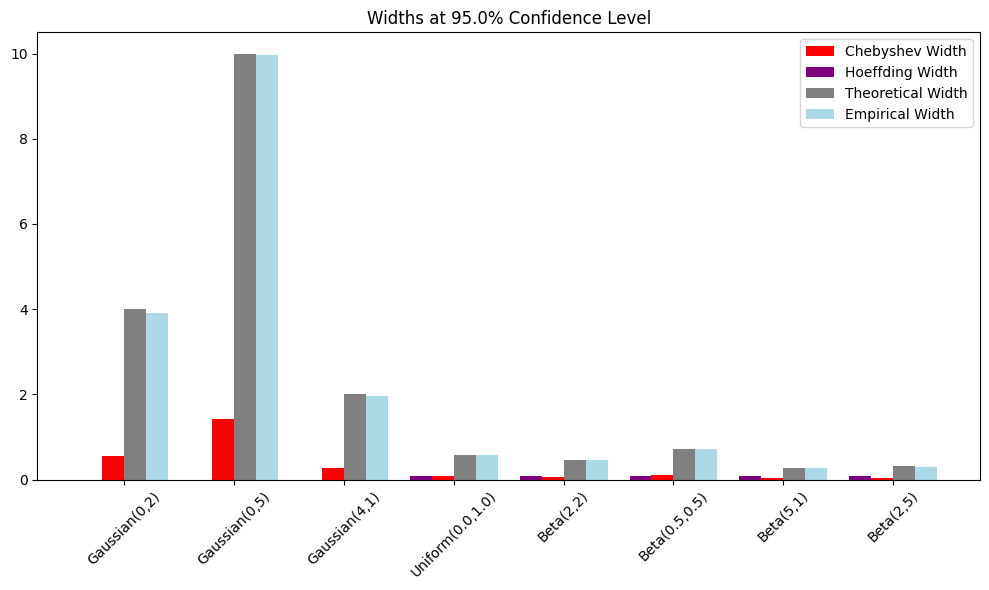

In [ ]:
names=[r["name"] for r in results]
width_cheby=[2*r["chebyshev"] for r in results]
width_hoeff=[2*r["hoeffding"] if r["hoeffding"] is not None else 0.0 for r in results]
width_var_theo=[2*np.sqrt(r["var_theo"]) for r in results]
width_var_emp=[2*np.sqrt(r["var"]) for r in results]
x=np.arange(len(names))
bar_width=0.2
plt.figure(figsize=(10,6))
plt.bar(x-0.5*bar_width, width_cheby, width=bar_width, label='Chebyshev Width', color='r')
plt.bar(x-1.5*bar_width, width_hoeff, width=bar_width, label='Hoeffding Width', color='purple')
plt.bar(x+0.5*bar_width, width_var_theo, width=bar_width, label='Theoretical Width', color='grey')
plt.bar(x+1.5*bar_width, width_var_emp, width=bar_width, label='Empirical Width', color='lightblue')
plt.xticks(x, names, rotation=45)
plt.title(f'Widths at {(1-delta)*100}% Confidence Level')
plt.legend()
plt.tight_layout()
plt.show()

## Problems 1 and 2 discussion

As we can see in the graphs for each kind of distribution, we have plotted the theorical and empirical means and standar deviations (as the square root of the variance), as well as the Chebyshev and Hoeffding's error bars, for a 95% confidence interval.

All generated distributions have similar empirical and theoretical variables, which indicates good sampling size (n=1000), and the intervals are centered around the empirical mean value.

Most distributions (except N(0,5) that has a very large variance) have an empirical variance relatively similar to the theoretical variance

Now, let's break down the results distribution by distribution:

- Gaussian:

    - The Gaussian plot does not show Hoeffding's interval because the Hoeffding inequality requires the random variable to be bounded in an interval $[a,b]$, which is not the case for the Gaussian distribution.

    - The interval size depends mostly on the variance. This is, the larger the variance, the larger the interval.

For the propsed Beta and Uniform distributions, the Hoeffding bound is identical, as it only depends on the $a$ and $b$ values, which are the same for these distributions.

- Uniform:

    - Both inequalities work well for this distribution and offer very similar results, since the uniform distribution is perfectly bounded and symetrical. All the intervals are very slim, as the variance is very low

- Beta:
    
    - Both inequalities apply since they are bounded. The behaviour of the two inequalities depend strongly on the variance:

        - B(0.5,0.5) is very spread, so Chebychev > Hoeffding

        - B(2,2) is moderately concentrated, so Chebychev ~ Hoeffding (very similar)

        - B(5,1) and B(2,5) are highly concentrated, with very small variance, which allows Chebychev < Hoeffding

This is, with the beta distribution we can see how Chebyshev adapts to the variance, while Hoeffsing remains constant as if only uses the bounds.


## Problem 3 - 68-95-99.7 rule

- 68% of samples lie within 1 standard deviation from the mean
- 95% of samples lie within 2 standard devaition from the mean
- 99.7% of samples lie within 3 standard devaitions from the mean

In [ ]:
def percentages_rule(samples):
    mean_emp, var_emp=mean_var(samples)
    std_emp=np.sqrt(var_emp)
    if std_emp==0:
        return 0.0, 0.0, 0.0
    distances=np.abs(samples - mean_emp)
    p1=np.mean(distances <= 1*std_emp)
    p2=np.mean(distances <= 2*std_emp)
    p3=np.mean(distances <= 3*std_emp)
    return p1, p2, p3

In [ ]:
print(f"============= Gaussian Distributions ============")
for (mu,sigma), samples in zip(gaussian_params, gaussian_samples):
    p1_g, p2_g, p3_g=percentages_rule(samples)
    print(f"Gaussian({mu},{sigma})")
    print(f"{p1_g*100:.2f}% within 1 SD, {p2_g*100:.2f}% within 2 SD, {p3_g*100:.2f}% within 3 SD")
print()

print(f"============= Uniform Distribution ============")
p1_u, p2_u, p3_u=percentages_rule(uniform_samples)
print(f"Uniform({a},{b})")
print(f"{p1_u*100:.2f}% within 1 SD, {p2_u*100:.2f}% within 2 SD, {p3_u*100:.2f}% within 3 SD")
print()

print(f"============= Beta Distributions ============")
for (alpha,beta), samples in zip(beta_params, beta_samples):
    p1_b, p2_b, p3_b=percentages_rule(samples)
    print(f"Beta({alpha},{beta})")
    print(f"{p1_b*100:.2f}% within 1 SD, {p2_b*100:.2f}% within 2 SD, {p3_b*100:.2f}% within 3 SD")
    print()

============= Gaussian Distributions ============
Gaussian(0,2)
68.60% within 1 SD, 95.60% within 2 SD, 99.70% within 3 SD
Gaussian(0,5)
67.90% within 1 SD, 95.30% within 2 SD, 99.70% within 3 SD
Gaussian(4,1)
69.60% within 1 SD, 95.30% within 2 SD, 99.50% within 3 SD

============= Uniform Distribution ============
Uniform(0.0,1.0)
57.70% within 1 SD, 100.00% within 2 SD, 100.00% within 3 SD

============= Beta Distributions ============
Beta(2,2)
63.50% within 1 SD, 98.70% within 2 SD, 100.00% within 3 SD

Beta(0.5,0.5)
51.20% within 1 SD, 100.00% within 2 SD, 100.00% within 3 SD

Beta(5,1)
72.20% within 1 SD, 95.20% within 2 SD, 98.90% within 3 SD

Beta(2,5)
66.90% within 1 SD, 96.40% within 2 SD, 99.80% within 3 SD



We see that the gaussian is the only distribution that matches this rule, since this is a property of normal distributions (bell-shaped).

The uniform distribution is flat, and for the beta distribution we observe different behaviours:
- B(0.5,0.5) is U-shaped
- B(5,1) is far from a bell-shape
- B(2,2) and B(2,5) produce similar results to the ones from the rule, but the explanation is different:
    - B(2,2) is completely symmetric and concentrated around its mean value; it is "kind of bell-shaped"
    - B(2,5) is not symmetric but it is highly concentrated near cero, therefore, it has a small standard deviation

These results confirm that the 68-95-99.7 rule is characteristic to the Normal distributions, but some non-gaussian distributions may occasionally show similar percentages because of their particular shape (symmetric or highly peaked).


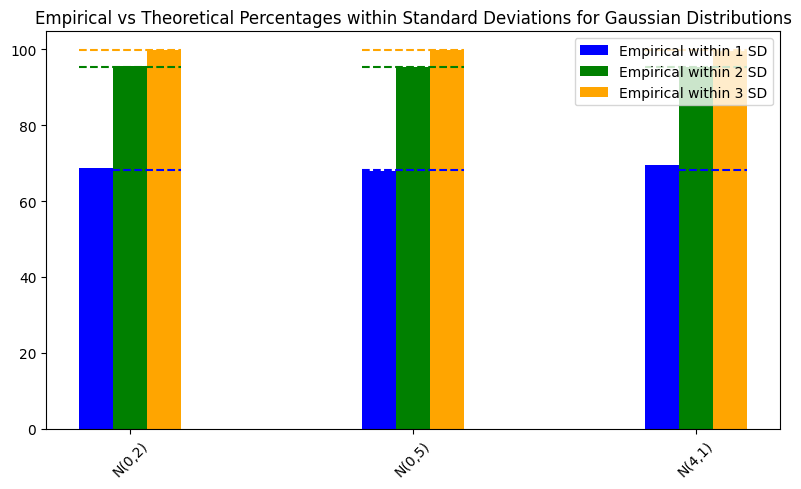

In [ ]:
theoretical=np.array([68.27,95.45,99.73])

labels=[]
empirical_vals=[]

for (mu,sigma), samples in zip(gaussian_params, gaussian_samples):
    p1, p2, p3=percentages_rule(samples)
    labels.append(f'N({mu},{sigma})')
    empirical_vals.append([
        p1*100,
        p2*100,
        p3*100
    ])
empirical_vals=np.array(empirical_vals)
x=np.arange(len(labels))
bar_width=0.12
plt.figure(figsize=(8,5))
plt.bar(x - bar_width, empirical_vals[:,0], width=bar_width, label='Empirical within 1 SD', color='b')
plt.bar(x, empirical_vals[:,1], width=bar_width, label='Empirical within 2 SD', color='g')
plt.bar(x + bar_width, empirical_vals[:,2], width=bar_width, label='Empirical within 3 SD', color='orange')
for i in range(len(labels)):
    plt.hlines(theoretical, i - 1.5*bar_width, i + 1.5*bar_width, colors=['b','g','orange'], linestyles='dashed')
plt.xticks(x, labels, rotation=45)
plt.title('Empirical vs Theoretical Percentages within Standard Deviations for Gaussian Distributions')
plt.legend()
plt.tight_layout()
plt.show()


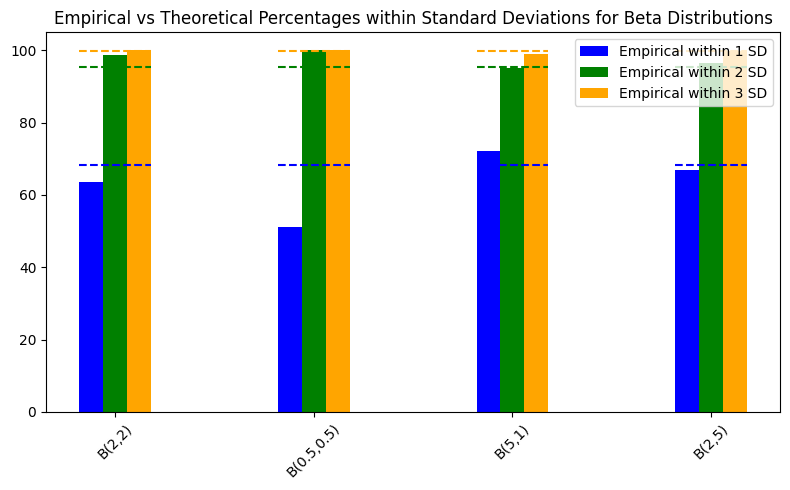

In [ ]:
theoretical=np.array([68.27,95.45,99.73])

labels=[]
empirical_vals=[]

for (alpha,beta), samples in zip(beta_params, beta_samples):
    p1, p2, p3=percentages_rule(samples)
    labels.append(f'B({alpha},{beta})')
    empirical_vals.append([
        p1*100,
        p2*100,
        p3*100
    ])
empirical_vals=np.array(empirical_vals)
x=np.arange(len(labels))
bar_width=0.12
plt.figure(figsize=(8,5))
plt.bar(x - bar_width, empirical_vals[:,0], width=bar_width, label='Empirical within 1 SD', color='b')
plt.bar(x, empirical_vals[:,1], width=bar_width, label='Empirical within 2 SD', color='g')
plt.bar(x + bar_width, empirical_vals[:,2], width=bar_width, label='Empirical within 3 SD', color='orange')
for i in range(len(labels)):
    plt.hlines(theoretical, i - 1.5*bar_width, i + 1.5*bar_width, colors=['b','g','orange'], linestyles='dashed')
plt.xticks(x, labels, rotation=45)
plt.title('Empirical vs Theoretical Percentages within Standard Deviations for Beta Distributions')
plt.legend()
plt.tight_layout()
plt.show()


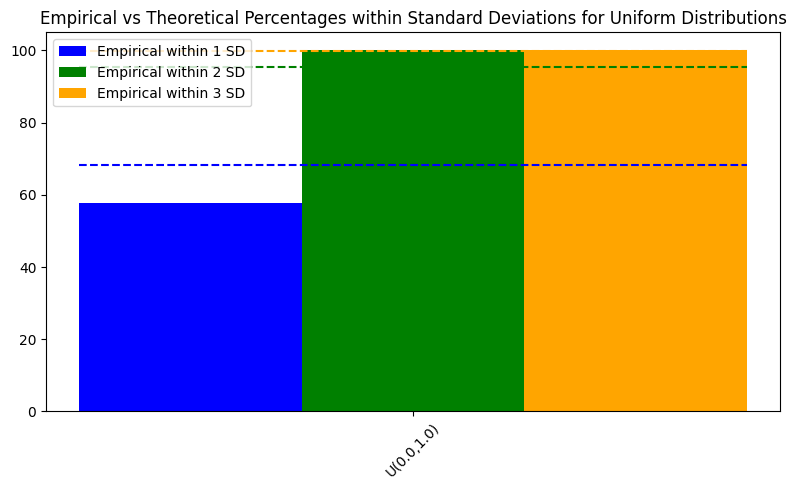

In [ ]:
theoretical=np.array([68.27,95.45,99.73])

labels=[]
empirical_vals=[]

p1, p2, p3=percentages_rule(uniform_samples)
labels.append(f'U({a},{b})')
empirical_vals.append([
    p1*100,
    p2*100,
    p3*100
])
empirical_vals=np.array(empirical_vals)
x=np.arange(len(labels))
bar_width=0.12
plt.figure(figsize=(8,5))
plt.bar(x - bar_width, empirical_vals[:,0], width=bar_width, label='Empirical within 1 SD', color='b')
plt.bar(x, empirical_vals[:,1], width=bar_width, label='Empirical within 2 SD', color='g')
plt.bar(x + bar_width, empirical_vals[:,2], width=bar_width, label='Empirical within 3 SD', color='orange')
for i in range(len(labels)):
    plt.hlines(theoretical, i - 1.5*bar_width, i + 1.5*bar_width, colors=['b','g','orange'], linestyles='dashed')
plt.xticks(x, labels, rotation=45)
plt.title('Empirical vs Theoretical Percentages within Standard Deviations for Uniform Distributions')
plt.legend()
plt.tight_layout()
plt.show()
